In [ ]:
import pickle

f = open('koyuu_noun_dic.binaryfile','rb')
noun_dic= pickle.load(f)

import numpy as np

noun_vec_list = list(noun_dic.values())

re_noun_vec_list = []

import random 

sample_list = random.sample(noun_vec_list, int(len(noun_vec_list)/2))


for i in sample_list:
    a = i.reshape(50,)
    re_noun_vec_list.append(a)

re_noun_vec_list = np.array(re_noun_vec_list)


import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import random

# methodのリスト
method_list = ("average", "centroid", "complete", "median", "single", "ward", "weighted")
data = []   # dataを格納するリスト
label = []  # labelを格納するリスト

# dataを20個生成
for i in range(len(re_noun_vec_list)):
    num = i
    data.append(re_noun_vec_list[i])
    label.append(str(i))

# DataFrameオブジェクト生成
df = pd.DataFrame(data)

# クラスタリング
for method in method_list:
    Z = linkage(df, method=method, metric="euclidean")
    dendrogram(Z, labels=label)
    plt.title(method)
    plt.show()
    break

# 階層クラスタ

In [3]:
import os
 
path = './DBSCAN/'
 
list_file = os.listdir(path)
print(list_file)

['0.6_1.binaryfile', '0.2_7.binaryfile', '0.8_5.binaryfile', '0.6_9.binaryfile', '0.4_7.binaryfile', '0.6_3.binaryfile', '0.2_5.binaryfile', '0.8_7.binaryfile', '0.4_5.binaryfile', '0.2_3.binaryfile', '0.8_9.binaryfile', '0.6_5.binaryfile', '0.4_3.binaryfile', '0.8_1.binaryfile', '.ipynb_checkpoints', '0.4_9.binaryfile', '0.2_1.binaryfile', '0.6_7.binaryfile', '0.4_1.binaryfile', '0.2_9.binaryfile', '0.8_3.binaryfile']


In [43]:
import pickle

data_1_dic = {}
data_3_dic = {}
data_5_dic = {}
data_7_dic = {}
data_9_dic = {}

eps_list =[]
for file in list_file:
    f_name =  "./DBSCAN/" + str(file)
    
    try:
        f = open(f_name,'rb')
        noun_dic = pickle.load(f)
    
        minPts = list(noun_dic.keys())[0]
        eps = list(noun_dic[minPts].keys())[0]
        data = noun_dic[minPts][eps]
        
        if eps == 1:
            
            data_1_dic[minPts] = data
        if eps == 3:
            
            data_3_dic[minPts] = data
        if eps == 5:
            
            data_5_dic[minPts] = data
        if eps == 7:
            
            data_7_dic[minPts] = data
        if eps == 9:
            
            data_9_dic[minPts] = data

    except:
        print("error")


error
error


In [155]:
data_dic_list = [data_1_dic, data_3_dic, data_5_dic,data_7_dic,data_9_dic]

f = open('sample_data.binaryfile','wb')
pickle.dump(data,f)
f.close

# 可視化

In [156]:
minPts_list =sorted(list(data_1_dic.keys()))
minPts_list

[0.2, 0.4, 0.6, 0.8]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


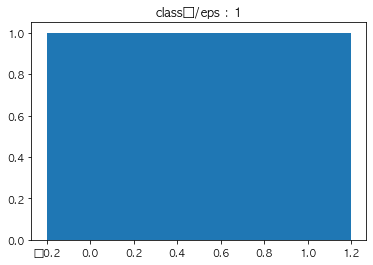

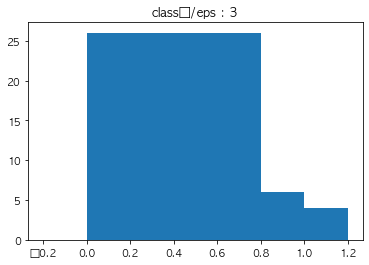

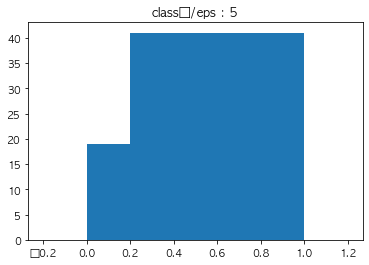

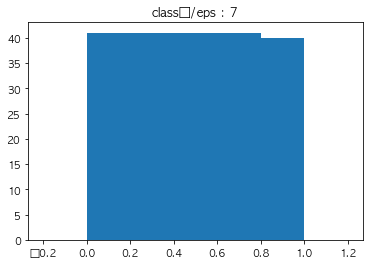

error
error


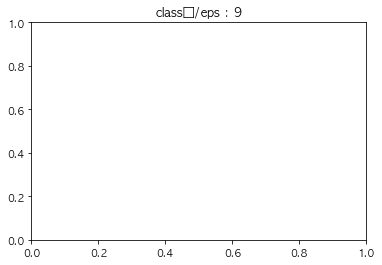

In [159]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

eps = 1

for data_dic in data_dic_list:
    #print(data_dic)
    
    num_class_list = []
    num_outlier_list = []
    
    for minPts in minPts_list:
        try:
            data = data_dic[minPts]
    
            num_class = np.max(data)
            outlier = len(np.where(data == -1)[0])
            num_outlier_list.append(outlier)
            
            class1 = len(np.where(data == 1)[0])
            num_class_list.append(class1)
            
            #print("num_class", num_class)
            #print("outlier", outlier)
        
        except:
            print("error")
    
    
    
    # num_class_list可視化
    try:
        name = "class数/eps : "  + str(eps)
        plt.title(name)
    
        left = np.array(minPts_list)
        height = np.array(num_class_list)
        plt.bar(left, height)
        plt.show()
    
    except:
        print("error")
    
    eps += 2

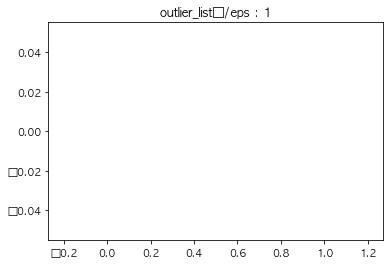

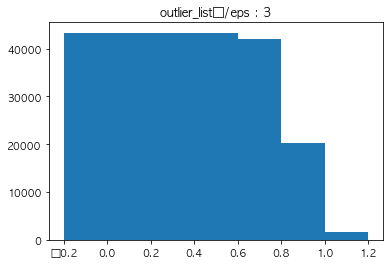

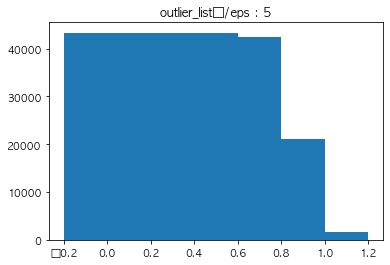

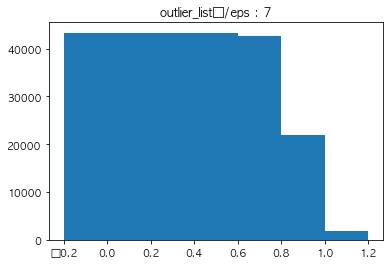

error
error


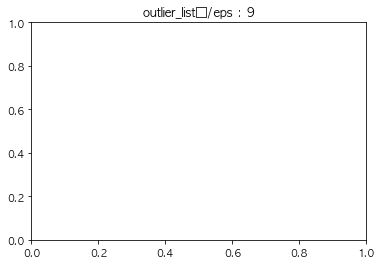

In [160]:
import numpy as np
import matplotlib.pyplot as plt

eps = 1

for data_dic in data_dic_list:
    #print(data_dic)
    
    num_class_list = []
    num_outlier_list = []
    
    for minPts in minPts_list:
        try:
            data = data_dic[minPts]
    
            num_class = np.max(data)
            outlier = len(np.where(data == -1)[0])
            num_outlier_list.append(outlier)
            
            class1 = len(np.where(data == 1)[0])
            num_class_list.append(class1)
            
            #print("num_class", num_class)
            #print("outlier", outlier)
        
        except:
            print("error")

    # num_outlier_list数
    try:
        name = "outlier_list数/eps : "  + str(eps)
        plt.title(name)
    
        left = np.array(minPts_list)
        height = np.array(num_outlier_list)
        plt.bar(left, height)
        plt.show()
    
    except:
        print("error")
    
    eps += 2

# data_5_dicの0.6を採用
- outlayer数がなるべく多く、クラス数が多い組み合わせを選ぶ


In [164]:
data = data_5_dic[0.6]
data

array([ 0,  0, -1, ...,  0,  0, -1], dtype=int32)

In [170]:
len(data)

43349

In [165]:
outlier = len(np.where(data == -1)[0])
outlier

21193

In [166]:
num_class = np.max(data)
num_class

37

In [167]:
import pickle

f = open('sample_noun_vec_list.binaryfile','rb')
sample_noun_vec_list = pickle.load(f)

In [169]:
len(sample_noun_vec_list)

43349

In [182]:
 = [sample_noun_vec_list[i]  for i, n in enumerate(data) if n != -1]